In [1]:
# importing necessary libraries 

import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
#! pip install -U kaleido

c:\Users\amark\anaconda3\envs\Py38\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# reading the dataframe file

data = pd.read_csv("merged_data.csv")

# reading the first 5 rows of the dataset

data.head()

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Teenhome,Dt_Customer,Country,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,1826,0,189,104,379,111,189,218,1,4,...,0,6/16/14,SP,0,0,0,0,0,1,0
1,1,0,464,5,64,7,0,37,1,7,...,0,6/15/14,CA,0,1,0,0,0,1,0
2,10476,0,134,11,59,15,2,30,1,3,...,1,5/13/14,US,0,0,0,0,0,0,0
3,1386,0,10,0,1,0,0,0,1,1,...,1,5/11/14,AUS,0,0,0,0,0,0,0
4,5371,0,6,16,24,11,0,34,2,3,...,0,4/8/14,SP,0,0,1,0,0,1,0


## Column Analysis (lets try to do some basic column analysis)

1) Find the different data types present in data
2) find out the number of columns for each data types and also what are the columns under that datatype 
3) Create two list containing numerical and continous columns in it
3) Creating a function column_analysis to perform the task mentioned above

In [3]:
# Creating a function column_analysis to perform the task mentioned above

def column_analysis():
    
    # creating a new data frame for only columns
    df_column = pd.DataFrame(data.dtypes).reset_index()

    # Adding heading to column names 
    df_column.columns=["column_name","dtype"]
    df_column

    print("--------------------------------------------------------------")

    # what are the datatypes and it's value counts
    print(" Datatypes in the dataset and their respective value counts")
    display(df_column["dtype"].value_counts())

    print("--------------------------------------------------------------")
    
  


    # Group the DataFrame by 'dtype' column
    grouped_data = df_column.groupby('dtype')

    #Iterate over groups and display the grouped data
    for dtype, group in grouped_data:
        print("Data Type:", dtype)
        print(group)
        print()
        
    
        
        
        
        
        
# calling the function
column_analysis()


--------------------------------------------------------------
 Datatypes in the dataset and their respective value counts


int64     23
object     5
Name: dtype, dtype: int64

--------------------------------------------------------------
Data Type: int64
            column_name  dtype
0                    ID  int64
1               Recency  int64
2              MntWines  int64
3             MntFruits  int64
4       MntMeatProducts  int64
5       MntFishProducts  int64
6      MntSweetProducts  int64
7          MntGoldProds  int64
8     NumDealsPurchases  int64
9       NumWebPurchases  int64
10  NumCatalogPurchases  int64
11    NumStorePurchases  int64
12    NumWebVisitsMonth  int64
13           Year_Birth  int64
17              Kidhome  int64
18             Teenhome  int64
21         AcceptedCmp1  int64
22         AcceptedCmp2  int64
23         AcceptedCmp3  int64
24         AcceptedCmp4  int64
25         AcceptedCmp5  int64
26             Response  int64
27             Complain  int64

Data Type: object
       column_name   dtype
14       Education  object
15  Marital_Status  object
16         Income   object
19     Dt_Customer  object
20         Country  ob

### Data Preprocessing for Data Visualisation

The Goal would be to do the following:

1) Check for any inconsistency in the dataset
2) check for missing values and handle it with some imputation statergy
3) Check for outliers in the dataset and decide what statergy can be used to replace them 


In [4]:
# Checking the count of missing values before imputation

print(data.isna().sum())



ID                      0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Country                 0
AcceptedCmp1            0
AcceptedCmp2            0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
Response                0
Complain                0
dtype: int64


#### We have missing values only in Income

##### Below code will be dedicated to processing of only income

In [5]:
# Rename the column " Income " to "Income"
data  = data.rename(columns={" Income ":"Income"})





# creating a function "income_cao_transf" to perform all the task related to preprocessing of income columns

def income_col_transf():
    
     # As we can see the data in Income in in format $84,835 we need to remove the "$" and "," and ".00" convert the datatype of Income to Int64

    # Removing "$"
    data["Income"]=data["Income"].str.replace('$',"")
    # Removing ","
    data["Income"]=data["Income"].str.replace(',',"")
    # Removing ","
    data["Income"]=data["Income"].str.replace('.00',"")


    # filling the NaN values with 0 as string value 
    data["Income"] = data["Income"].fillna("0")

    # converting the datatype pf "Income" from object to int64
    data["Income"] = data["Income"].astype("int64")
    
#calling the function
income_col_transf()


C:\Users\amark\AppData\Local\Temp/ipykernel_9748/1190641217.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Income"]=data["Income"].str.replace('$',"")
C:\Users\amark\AppData\Local\Temp/ipykernel_9748/1190641217.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Income"]=data["Income"].str.replace('.00',"")


In [6]:
#Creating list for categorical and numerical columns (helpful as we can use this same lists anywhere as per our need)


numerical_columns = data.select_dtypes(include=['int64']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Note : for some reason i was not able to include this block of code in above function for now I will keep it as it is will work on it after some time 

In [7]:
# Checking the count of missing values after imputation (included in the function income_col_transf() )

print(data.isna().sum())

ID                     0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Country                0
AcceptedCmp1           0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
Response               0
Complain               0
dtype: int64


##### So all the missing values in Income are imputed by 0 as per above code block



#### Here we need to observe one thing i.e before imputation there were 24 missing values in "Income"
1) I replaced all those  24 "Nan" values with "0"(string) 
2) Then I converted the data type of "Income" to Int 
3) After above steps if we check all the data for rows with income zero the o/p is 26 values. So here 2 rows already had zero value 

#### Now I would like to replace all the 26 (0 values) with mean of the "income"

In [8]:
# checking what all Rows have been replaced by 0

data.loc[data['Income'] ==0,"Income"]

134     0
262     0
394     0
449     0
525     0
590     0
899     0
997     0
1096    0
1185    0
1213    0
1312    0
1323    0
1515    0
1558    0
1693    0
1804    0
1858    0
1863    0
1880    0
1967    0
1983    0
2045    0
2139    0
2165    0
2170    0
Name: Income, dtype: int64

In [9]:
# create a variable to store the mean value 
mean_income= round(data["Income"].mean(),0)

# convert the mean_income to int value since all majority of values in the Income column are int datatype as this will maintain the homogenity 
mean_income = mean_income.astype("int64")

'The mean value of the Income Column is : {}'.format(mean_income)


'The mean value of the Income Column is : 50120'

In [10]:
# replacing the 26 values who had income zero with mean_income

data.loc[data['Income'] ==0,"Income"]=mean_income

In [11]:
# checking if the values are replaced correctly in the desired rows
data[data["Income"]==50120]["Income"]

134     50120
262     50120
394     50120
449     50120
525     50120
590     50120
899     50120
997     50120
1096    50120
1185    50120
1213    50120
1312    50120
1323    50120
1515    50120
1558    50120
1693    50120
1804    50120
1858    50120
1863    50120
1880    50120
1967    50120
1983    50120
2045    50120
2139    50120
2165    50120
2170    50120
Name: Income, dtype: int64

#### Lets do some Outlier detection

1) lets plot box plots
2) lets store the output in some file for reference

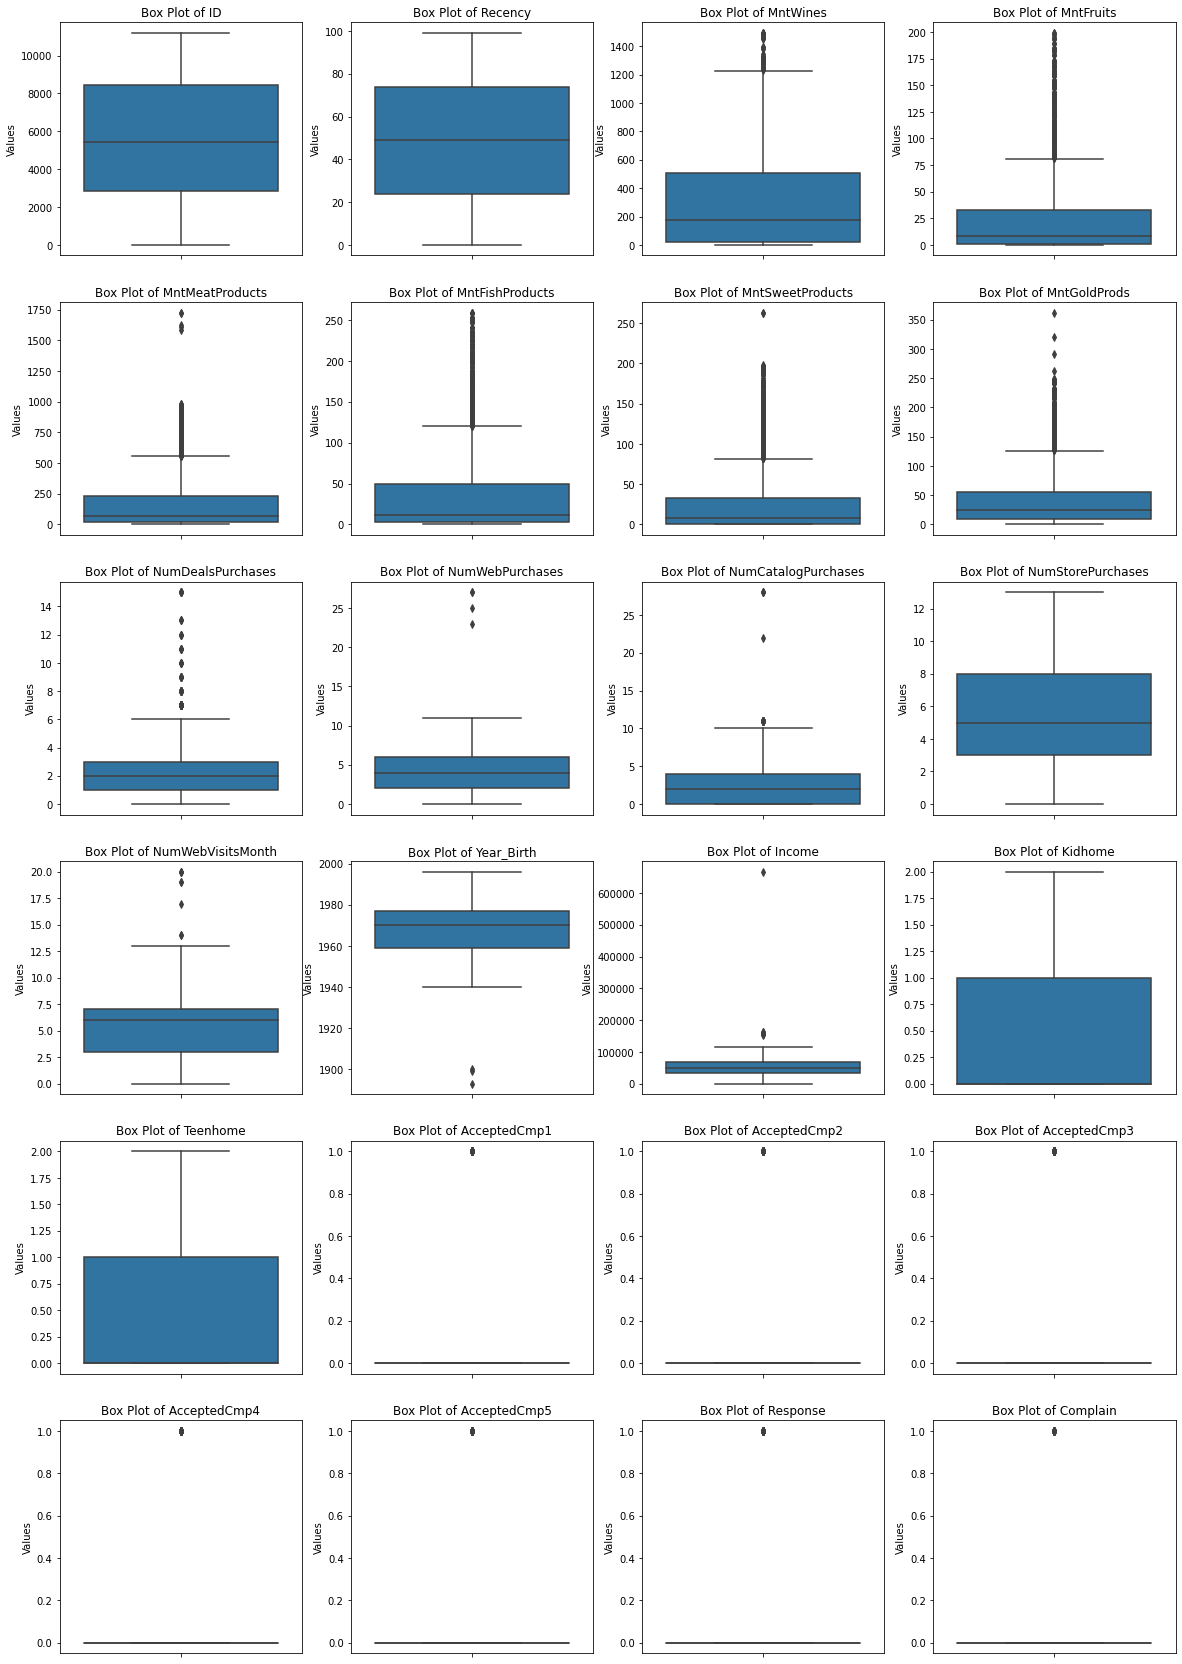

In [12]:
def box_plot():

    plt.figure(figsize=(20,30))
    for index,column in enumerate(numerical_columns):
    
        plt.subplot(6,4,index+1)
        sns.boxplot(data=data, y=column)
        plt.title(f"Box Plot of {column}")
        plt.ylabel("Values")
        
    


# calling the function
box_plot()




## Columns with/without outliers

1) With Outliers : 18 Columns

    MntWines, MntFruits,MntMeatProducts,MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases',NumCatalogPurchases,'NumWebVisitsMonth',
   'Year_Birth','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Complain'

2) Without Outliers : 5 columns

    'ID','Recency',NumStorePurchases,Kidhome','Teenhome'
    



In [13]:

#numerical_columns.append("Income")
numerical_columns

['ID',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'Response',
 'Complain']

### Demographics Analysis

Lets try to do some analysis on demographics

In [14]:
demographics_columns=["Year_Birth","Education","Marital_Status","Income","Kidhome","Teenhome","Country","Dt_Customer"]

data[demographics_columns].describe()

,Year_Birth,Income,Kidhome,Teenhome
count,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,50701.947321,0.444196,0.506250
std,11.984069,26298.530365,0.538398,0.544538
min,1893.000000,2.000000,0.000000,0.000000
25%,1959.000000,34176.000000,0.000000,0.000000
50%,1970.000000,50123.500000,0.000000,0.000000
75%,1977.000000,67480.500000,1.000000,1.000000
max,1996.000000,666666.000000,2.000000,2.000000


### INSIGHT FROM ABOVE BLOCK

1) the customer date of birth ranges from (1893-1996) so we dont have any customer after 1996 

2) Salary---> Min : 2$/year, MAX : 6,66,666$/year

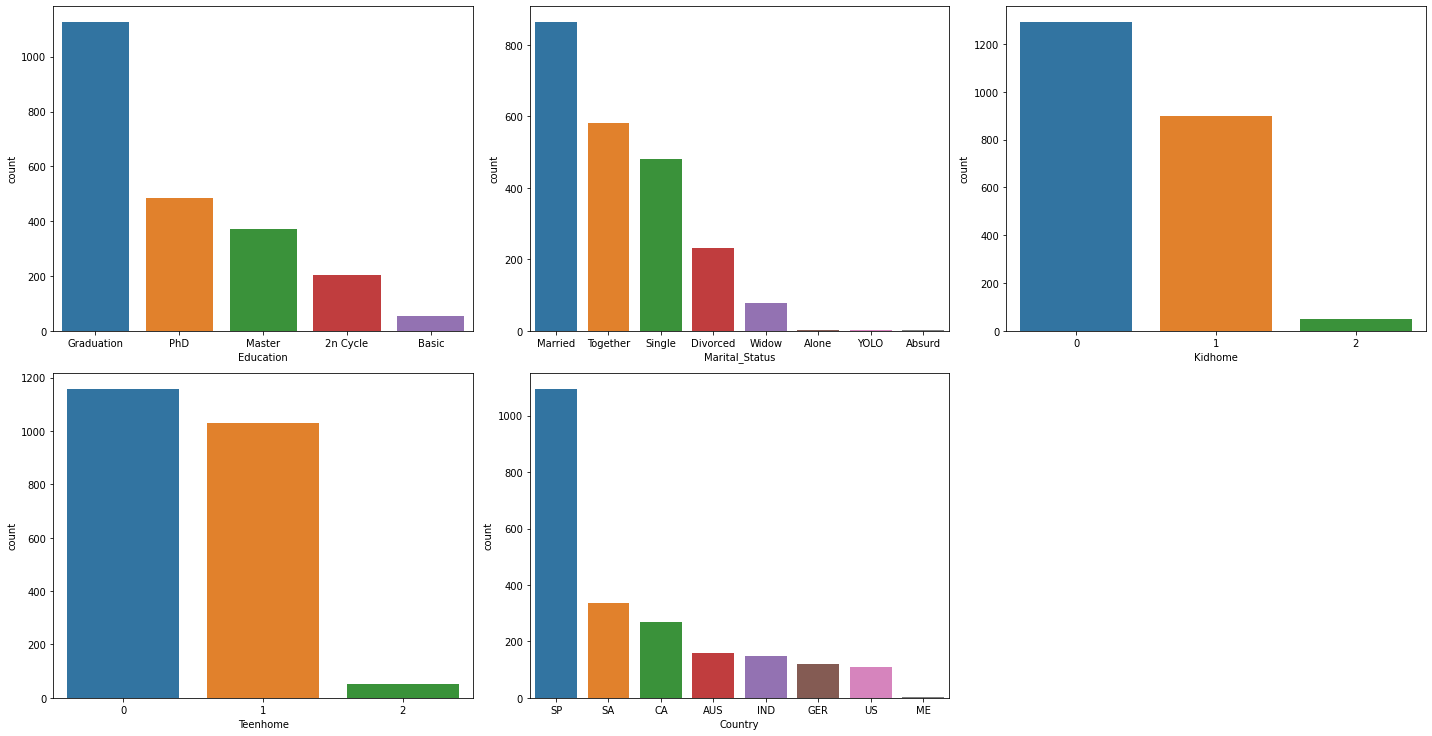

In [15]:
# Let plot some bar graphs to get a gist of what are the count of the categories

# creating a list of demographics columns that can be plotted as count plot and will make sense 

demographics_value_count_columns=["Education","Marital_Status","Kidhome","Teenhome","Country"]

plt.figure(figsize=(20,15))

for i,column in enumerate(demographics_value_count_columns):
    plt.subplot(3,3,i+1)
    sns.countplot(x=column,data=data,order=data[column].value_counts().index)
    
    
plt.tight_layout()



### As we can see above there is no point in ploting count_plot of "Year_Birth" , "Income" and "Dt_Customer"

In [16]:
## Lets create a new column age to know the age of the customers

# Get the current year
current_year = pd.Timestamp.now().year

data["age"]=current_year-data["Year_Birth"]

In [17]:
data["age"].describe()

count    2240.000000
mean       55.194196
std        11.984069
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max       131.000000
Name: age, dtype: float64

### Lets bin the age in groups

1) 26 - 35 (Age_1)
2) 36 - 60 (Age_2)
3) 61 - 80 (Age_3)
4) > 80 (Age_4)

In [18]:
# create labels and bins

labels=["Age_1","Age_2","Age_3","Age_4"]
bins=[26,36,61,81,float('inf')]

#create new column age_group
data["Age_Group"]=pd.cut(data["age"],bins=bins,labels=labels,right=False)

<AxesSubplot:xlabel='Age_Group', ylabel='count'>

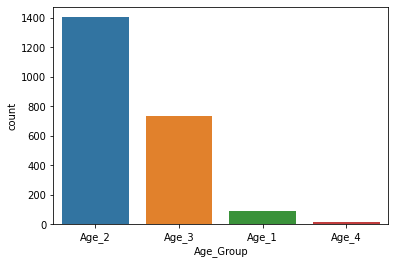

In [19]:
sns.countplot(x="Age_Group",data=data,order=data["Age_Group"].value_counts().index)